In [86]:
import os
import json
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import requests
import datetime as dt # to put a datestamp on the outputs
from pprint import pprint
from scipy.stats import linregress



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Resources/census.csv"


In [87]:
df = pd.read_csv("census.csv")
df.head()

,Unnamed: 0,Metro Area,2012 Pop,2012 Household Income,2017 Pop,2017 Household Income
0,0,"Aberdeen, SD Micro Area",40612,49652,42608,54533
1,1,"Aberdeen, WA Micro Area",72272,42440,71454,45483
2,2,"Abilene, TX Metro Area",165083,44007,169000,48156
3,3,"Ada, OK Micro Area",37438,40680,38289,46689
4,4,"Adjuntas, PR Micro Area",19458,13095,18525,11680


In [88]:
df["Pop Growth"] = df['2017 Pop'] - df['2012 Pop']
df["Income Growth"] = df['2017 Household Income'] - df['2012 Household Income']
df.head()

,Unnamed: 0,Metro Area,2012 Pop,2012 Household Income,2017 Pop,2017 Household Income,Pop Growth,Income Growth
0,0,"Aberdeen, SD Micro Area",40612,49652,42608,54533,1996,4881
1,1,"Aberdeen, WA Micro Area",72272,42440,71454,45483,-818,3043
2,2,"Abilene, TX Metro Area",165083,44007,169000,48156,3917,4149
3,3,"Ada, OK Micro Area",37438,40680,38289,46689,851,6009
4,4,"Adjuntas, PR Micro Area",19458,13095,18525,11680,-933,-1415


In [89]:
New_df = df.loc[(df['2017 Pop']>=300000)]
New_df.head()

,Unnamed: 0,Metro Area,2012 Pop,2012 Household Income,2017 Pop,2017 Household Income,Pop Growth,Income Growth
6,6,"Akron, OH Metro Area",702966,49936,703398,53418,432,3482
9,9,"Albany-Schenectady-Troy, NY Metro Area",870890,60841,881862,65743,10972,4902
13,13,"Albuquerque, NM Metro Area",885683,48990,905049,50781,19366,1791
18,18,"Allentown-Bethlehem-Easton, PA-NJ Metro Area",821273,58111,832790,62479,11517,4368
27,27,"Anchorage, AK Metro Area",380789,75196,399360,80724,18571,5528


In [90]:
New_df.to_csv("Census_N1.csv")

In [91]:
New_df.count()

Unnamed: 0               117
Metro Area               117
2012 Pop                 117
2012 Household Income    117
2017 Pop                 117
2017 Household Income    117
Pop Growth               117
Income Growth            117
dtype: int64

In [92]:
New_df.dtypes

Unnamed: 0                int64
Metro Area               object
2012 Pop                  int64
2012 Household Income     int64
2017 Pop                  int64
2017 Household Income     int64
Pop Growth                int64
Income Growth             int64
dtype: object

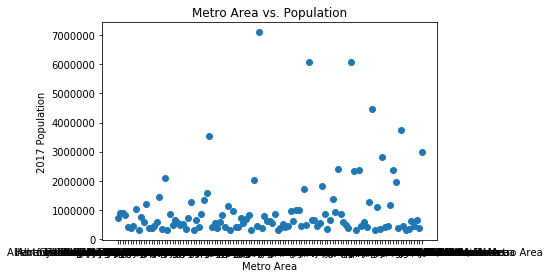

In [93]:
plt.scatter(New_df["Metro Area"], New_df["2017 Pop"])
plt.xlabel("Metro Area")
plt.ylabel("2017 Population")

plt.xlim()
plt.title("Metro Area vs. Population")

# Save image
plt.savefig("New_df{}.png")
plt.show()

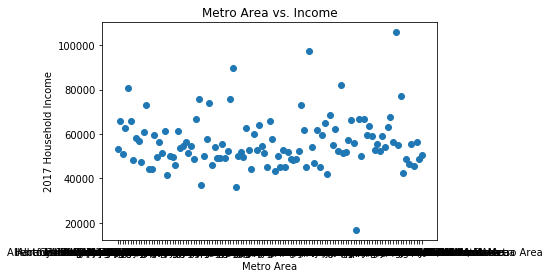

In [94]:
plt.scatter(New_df["Metro Area"], New_df["2017 Household Income"])
plt.xlabel("Metro Area")
plt.ylabel("2017 Household Income")

plt.xlim()
plt.title("Metro Area vs. Income")

# Save image
plt.savefig("New_df{}.png")
plt.show()

In [95]:
# Set x axis and tick locations
x_axis = np.arange(len(New_df))
tick_locations = [value+0.4 for value in x_axis]

([<matplotlib.axis.XTick at 0x1899e819588>,
 <a list of 117 Text xticklabel objects>)

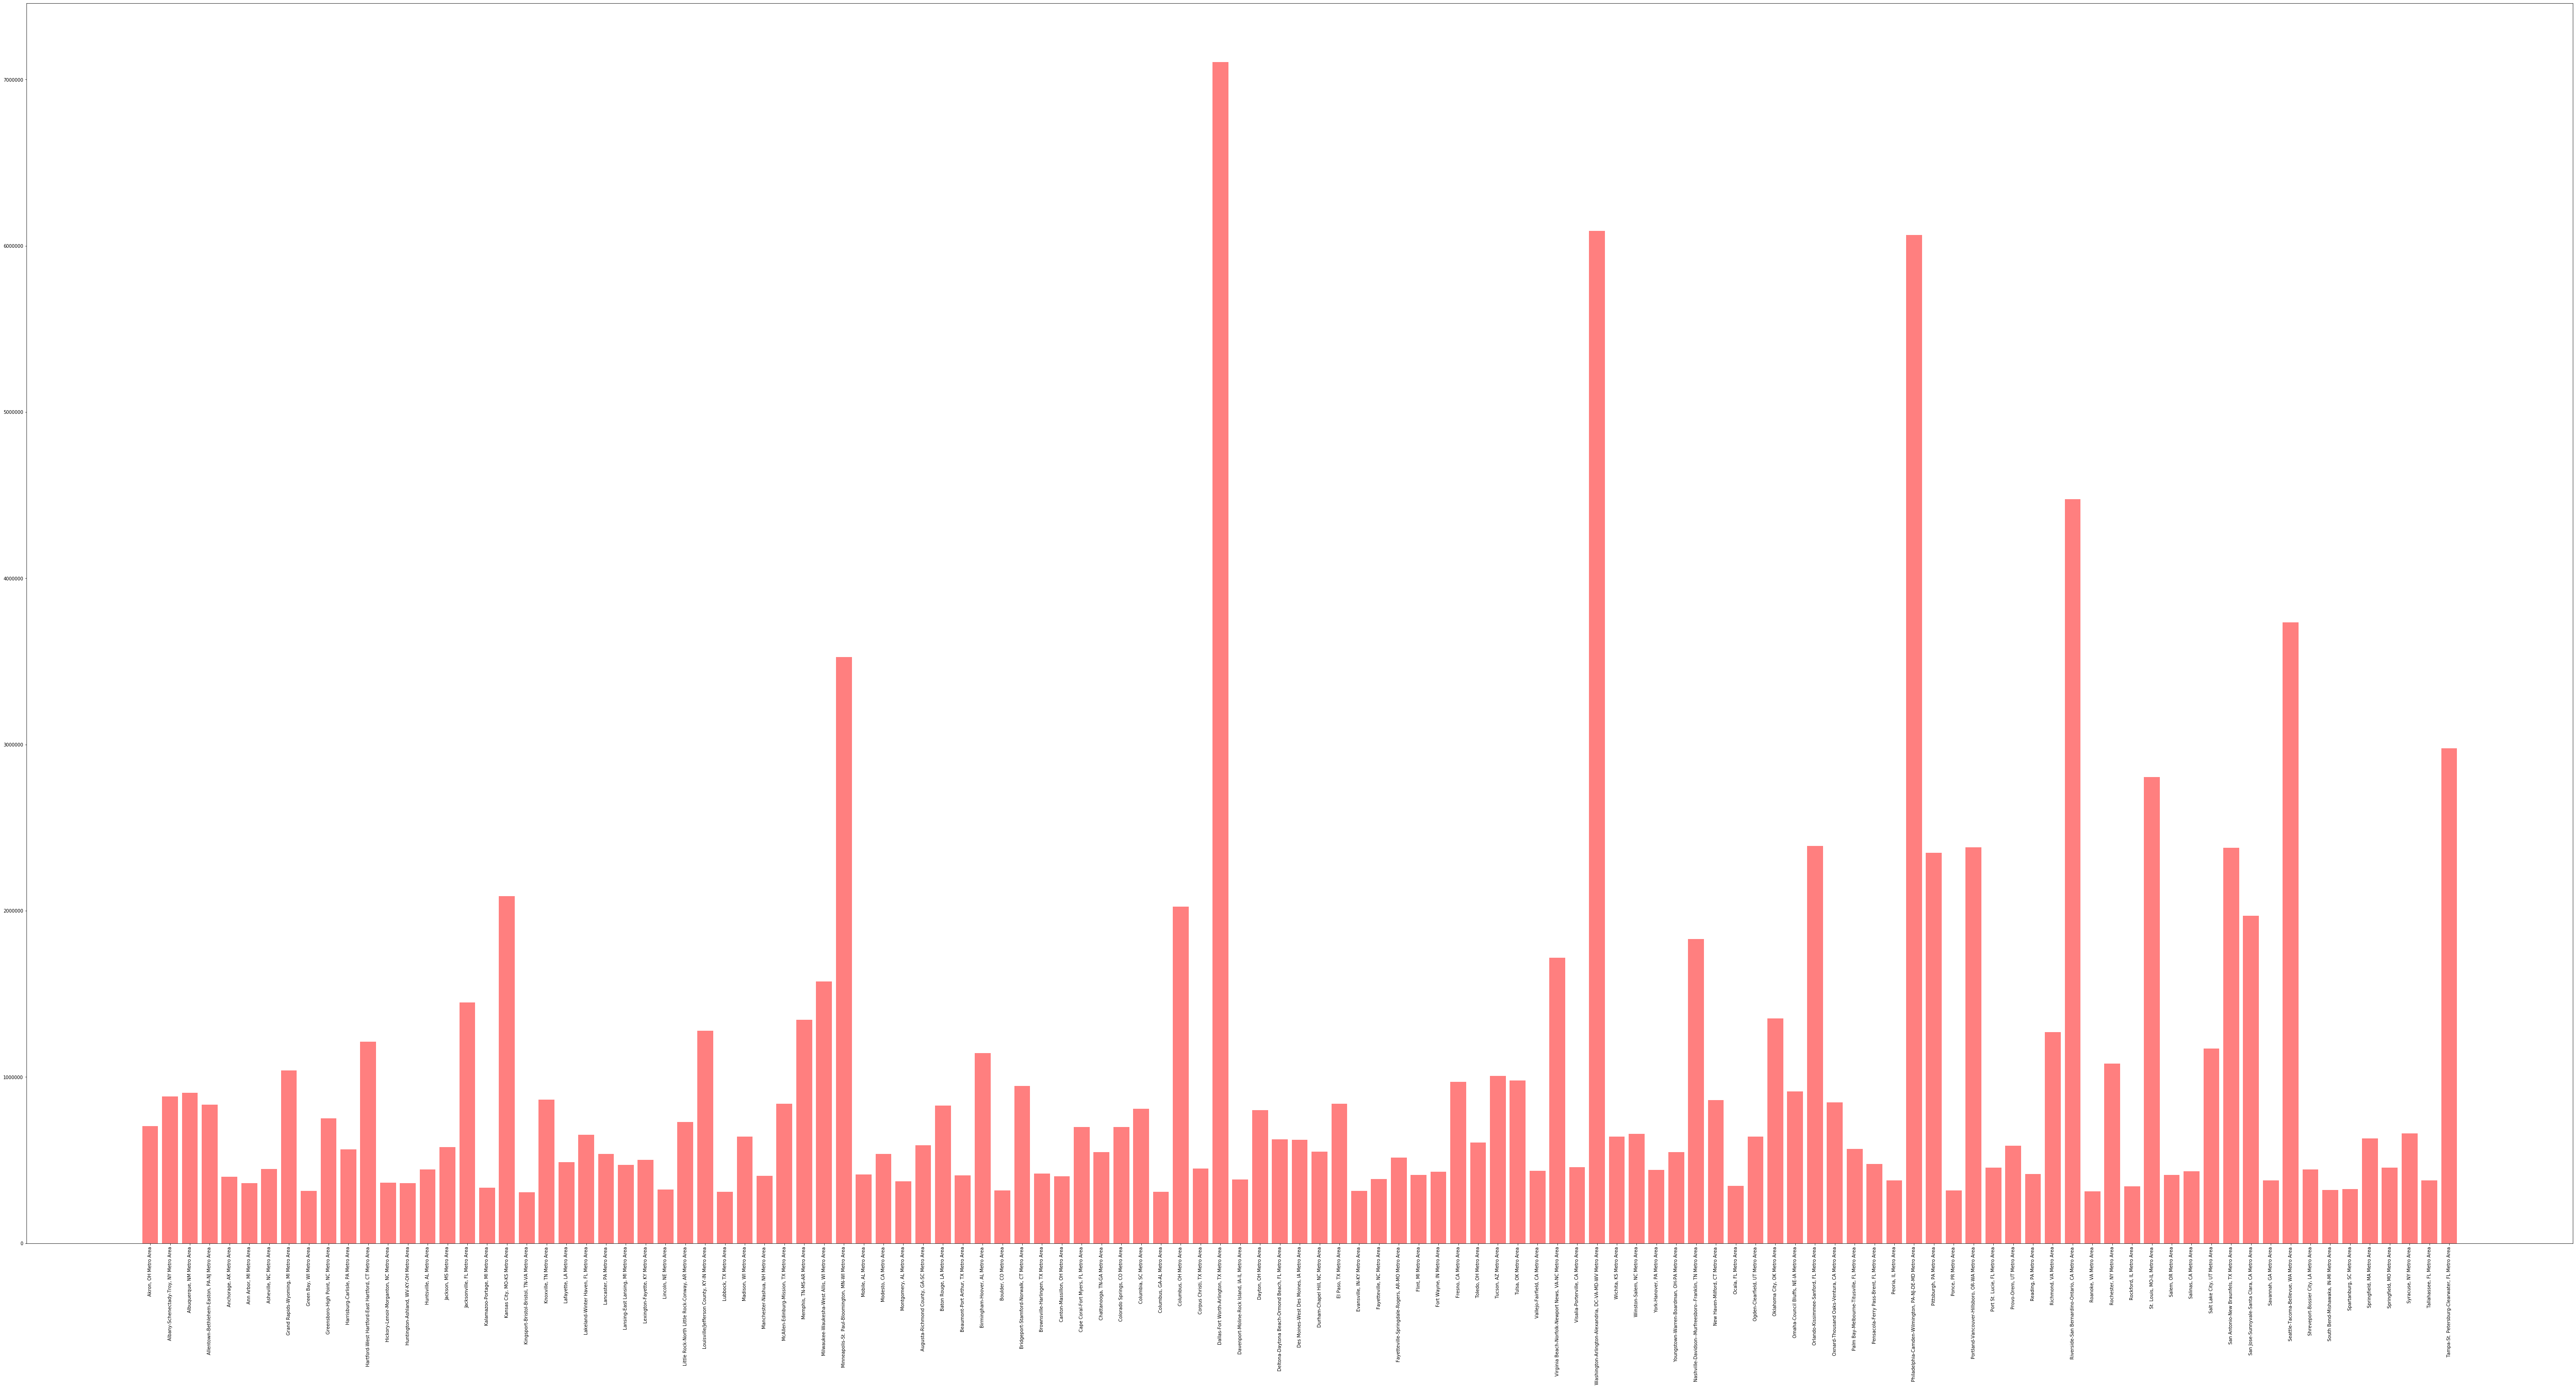

In [100]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(100,50))
plt.bar(x_axis, New_df["2017 Pop"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, New_df["Metro Area"], rotation = "vertical") 